# DSAI Lab Quiz 
# Aneez Ahmed Jaheezuddin 
# U1922298C
# FSP8

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

### Data Acquisition and information

In [2]:
noteData = pd.read_csv('bank_note_data.csv') #importing the dataset
noteData.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


In [3]:
noteData.dtypes

Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
Banknote     object
dtype: object

In [4]:
noteData.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


In [5]:
noteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Variance    1000 non-null float64
Skewness    1000 non-null float64
Kurtosis    1000 non-null float64
Entropy     1000 non-null float64
Banknote    1000 non-null object
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
noteData.shape

(1000, 5)

## Problem 1

### a) Describing and visualizing the numeric columns

In [7]:
noteData.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


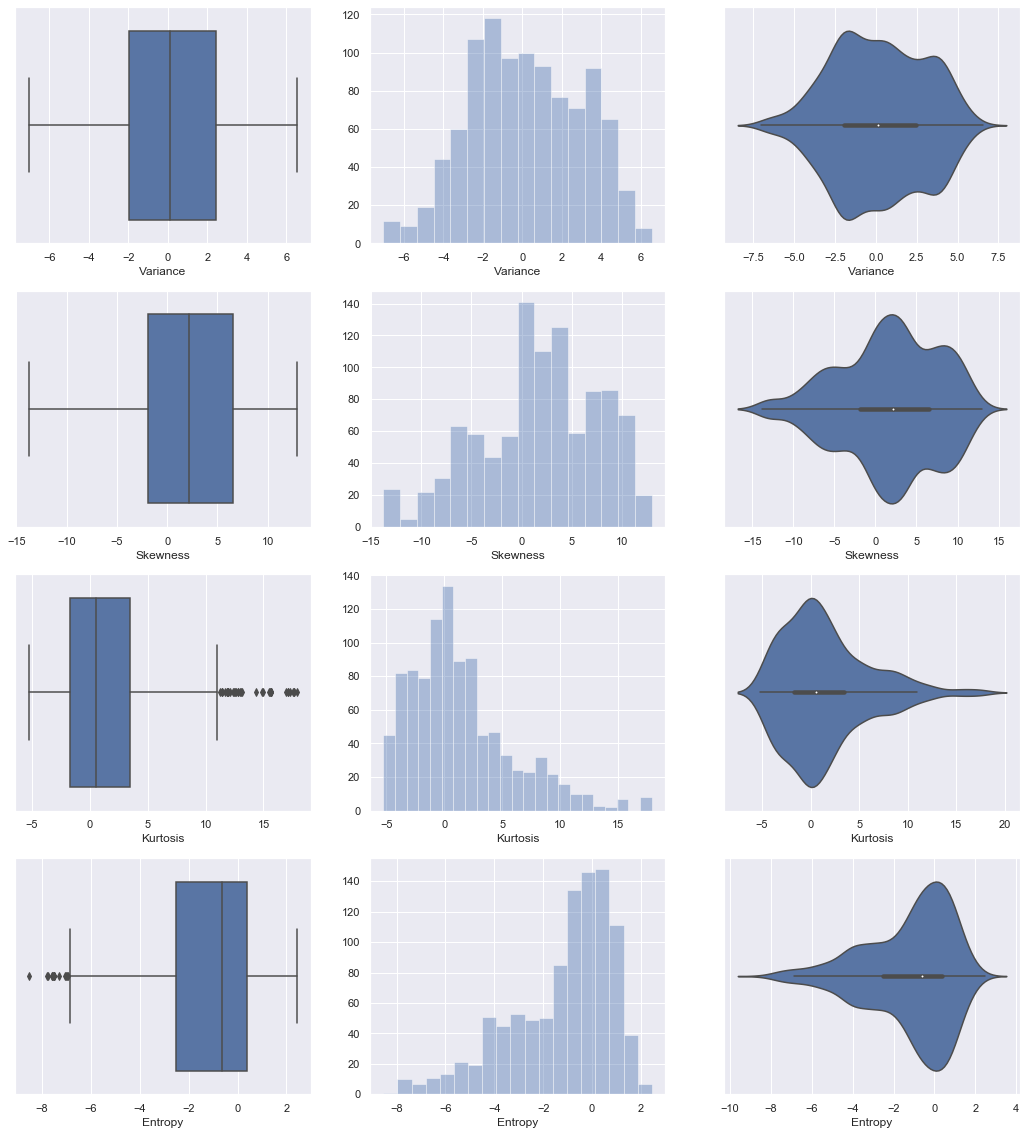

In [8]:
f, axes = plt.subplots(4, 3, figsize=(18, 20)) #grid formation for plot display
count = 0

for i in noteData:
    if noteData[i].dtypes != 'float64': # skip plot creation for categorical Banknotes
        continue
    
    sb.boxplot(noteData[i], orient = "h", ax = axes[count,0])
    sb.distplot(noteData[i], kde = False, ax = axes[count,1])
    sb.violinplot(noteData[i], ax = axes[count,2])
    
    count += 1

In [9]:
for i in noteData:
    if noteData[i].dtypes != 'float64':
        continue
        
    Q1 = noteData[i].quantile(0.25) #extracting first quartile value
    Q3 = noteData[i].quantile(0.75) #extracting third quartile value
    IQR = Q3 - Q1
    
    #compute interquarltile distance and count number of points that do not lie within it
    print("Total Number of outliers for ", i, ": ", ((noteData[i] < (Q1 - 1.5 * IQR)) | (noteData[i] > (Q3 + 1.5 * IQR))).sum())


Total Number of outliers for  Variance :  0
Total Number of outliers for  Skewness :  0
Total Number of outliers for  Kurtosis :  37
Total Number of outliers for  Entropy :  16


## b)

From the boxplots seen above and from the results obtained for the number of outliers in each numeric column, we can observe and infer that "Kurtosis" has the most number of outliers.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html : Documentation for finding quantiles in the dataset which can be used to count outliers

## c) Describing and visualizing column "Banknote"

In [10]:
noteData['Banknote'].describe()

count       1000
unique         2
top       Forged
freq         500
Name: Banknote, dtype: object

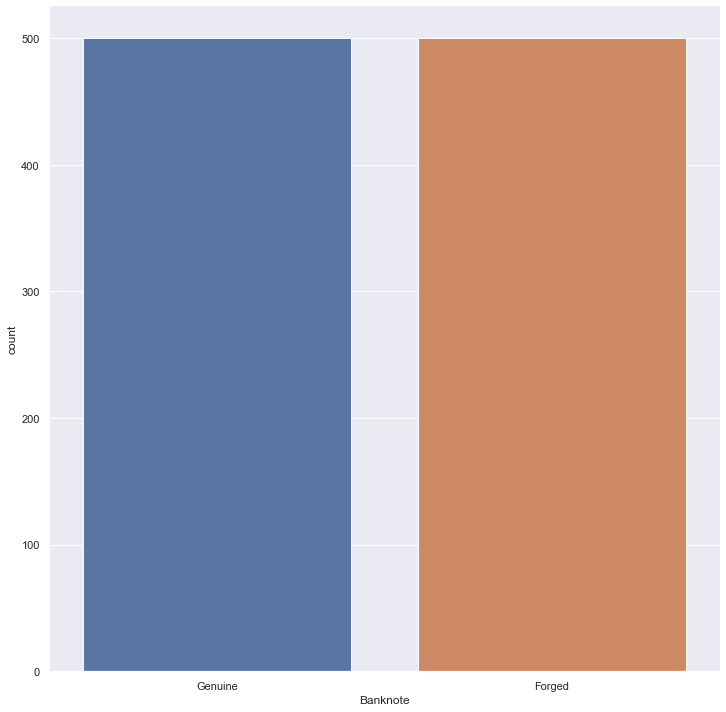

In [11]:
sb.catplot(x = 'Banknote', data = noteData, kind = "count", height = 10)

## d) Finding the ratio of genuine notes to forged notes

In [12]:
gCount = 0
fCount = 0

for index, row in noteData.iterrows():
    if(noteData.at[index, 'Banknote'] == 'Genuine'):
        gCount += 1
    elif(noteData.at[index, 'Banknote'] == 'Forged'):
        fCount += 1
    else:
        continue


gRatio = gCount/fCount
fRatio = fCount/gCount

print("Ratio (Genuine : Forged) = ", gRatio, " : ", fRatio)


Ratio (Genuine : Forged) =  1.0  :  1.0


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html - Documentation of dataframe.iterrows() function which was used to access each cell of "Banknote" field

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html - dataframe.at function to access an individual cell from a dataframe

## e) Visualizing the relationship between the numeric fields and categorical "Banknote"

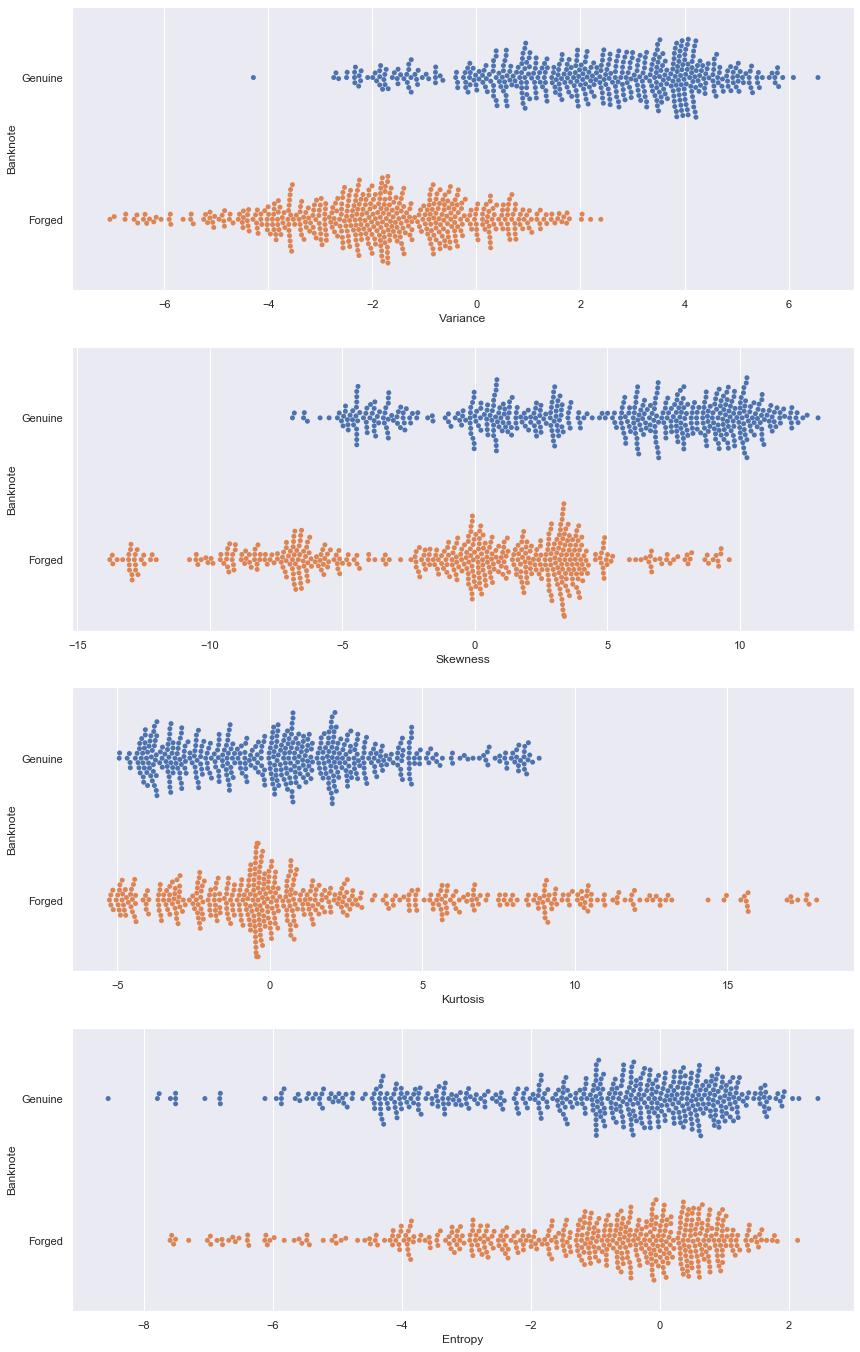

In [13]:
f, axes = plt.subplots(4, figsize=(14, 24))
count = 0

for i in noteData:
    if(noteData[i].dtypes != 'float64'):
        continue
    
    sb.swarmplot(x = noteData[i], y = 'Banknote', data = noteData, ax = axes[count])
    count += 1

# 2) 
### a) Random partition of dataset into test and train and creating a decision tree for each field
### b)  Predicting response of train data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.metrics import confusion_matrix

# shuffling and splitting dataset into train and test.
noteTrain, noteTest= train_test_split(noteData, test_size = 0.20) 

In [15]:
noteTrain.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
413,3.4769,-0.15314,2.53000,2.44950,Genuine
273,2.6946,6.79760,-0.40301,0.44912,Genuine
177,3.6582,5.68640,-1.71570,-0.23751,Genuine
418,-1.2576,1.58920,7.00780,0.42455,Genuine
453,3.5761,9.77530,-3.97950,-3.46380,Genuine


In [16]:
noteTest.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
879,-0.49081,2.84520,-3.6436,-3.10040,Forged
690,-1.28460,3.27150,-1.7671,-3.26080,Forged
55,4.82650,0.80287,1.6371,1.18750,Genuine
115,2.53310,2.91350,-0.8220,-0.12243,Genuine
792,-0.30432,2.65280,-2.7756,-0.65647,Forged


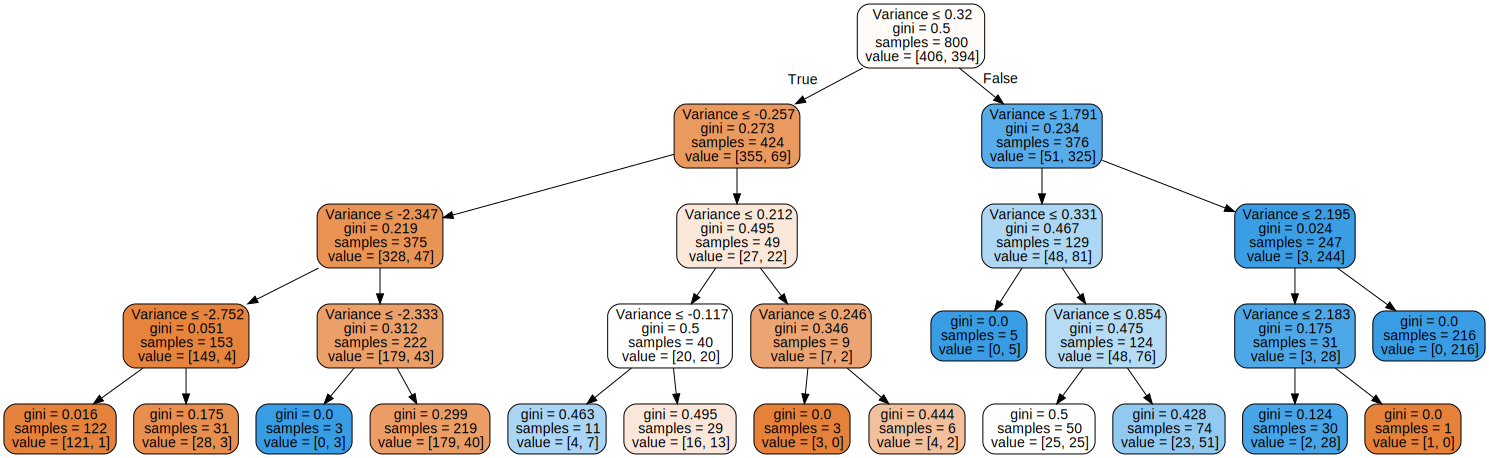

In [17]:
varianceTree = DecisionTreeClassifier(max_depth = 4)

yTrain = pd.DataFrame(noteTrain['Banknote'])
varianceTrain = pd.DataFrame(noteTrain['Variance'])

yTest = pd.DataFrame(noteTest['Banknote'])
varianceTest = pd.DataFrame(noteTest['Variance'])

varianceTree.fit(varianceTrain, yTrain)
varianceDot = export_graphviz(varianceTree, feature_names = varianceTrain.columns, out_file = None, filled = True,rounded = True, special_characters = True)
graphviz.Source(varianceDot)

Classification Accuracy 	: 0.86


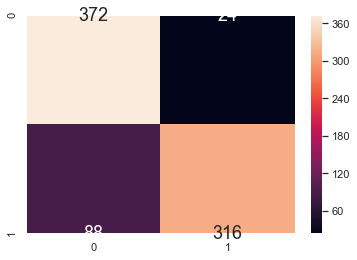

In [18]:
yTrainPred = varianceTree.predict(varianceTrain)
print("Classification Accuracy \t:", varianceTree.score(varianceTrain, yTrain))
sb.heatmap(confusion_matrix(yTrain, yTrainPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.85


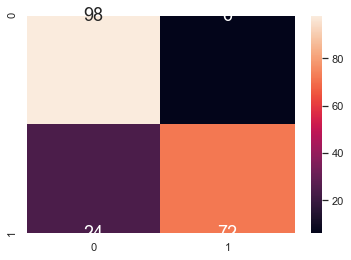

In [19]:
yTestPred = varianceTree.predict(varianceTest)
print("Classification Accuracy \t:", varianceTree.score(varianceTest, yTest))
sb.heatmap(confusion_matrix(yTest, yTestPred), annot = True, fmt=".0f", annot_kws={"size": 18})

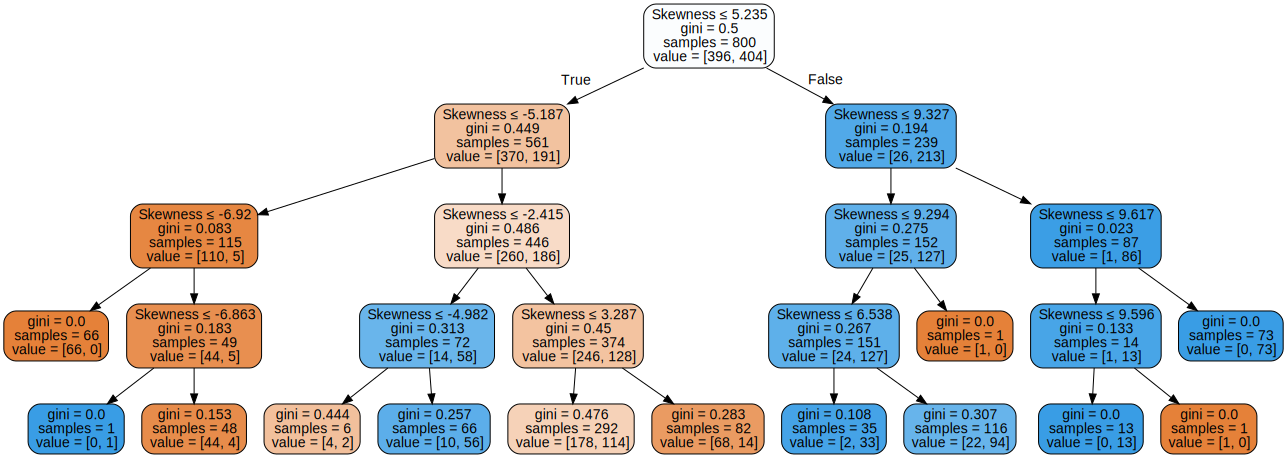

In [20]:
skewnessTree = DecisionTreeClassifier(max_depth = 4)

yTrain = pd.DataFrame(noteTrain['Banknote'])
skewnessTrain = pd.DataFrame(noteTrain['Skewness'])

skewnessTree.fit(skewnessTrain, yTrain)
skewnessDot = export_graphviz(skewnessTree, feature_names = skewnessTrain.columns, out_file = None, filled = True,rounded = True, special_characters = True)
graphviz.Source(skewnessDot)

Classification Accuracy 	: 0.79


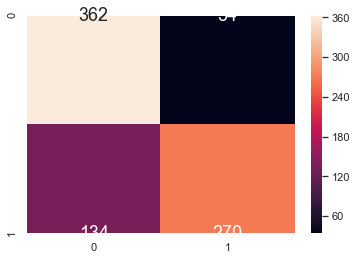

In [21]:
yTrainPred = skewnessTree.predict(skewnessTrain)
print("Classification Accuracy \t:", skewnessTree.score(skewnessTrain, yTrain))
sb.heatmap(confusion_matrix(yTrain, yTrainPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.785


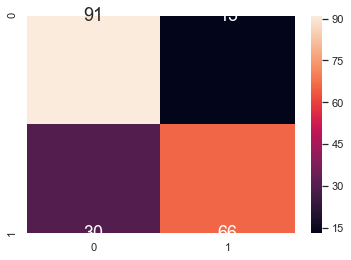

In [22]:
yTest = pd.DataFrame(noteTest['Banknote'])
skewnessTest = pd.DataFrame(noteTest['Skewness'])

yTestPred = skewnessTree.predict(skewnessTest)
print("Classification Accuracy \t:", skewnessTree.score(skewnessTest, yTest))
sb.heatmap(confusion_matrix(yTest, yTestPred), annot = True, fmt=".0f", annot_kws={"size": 18})

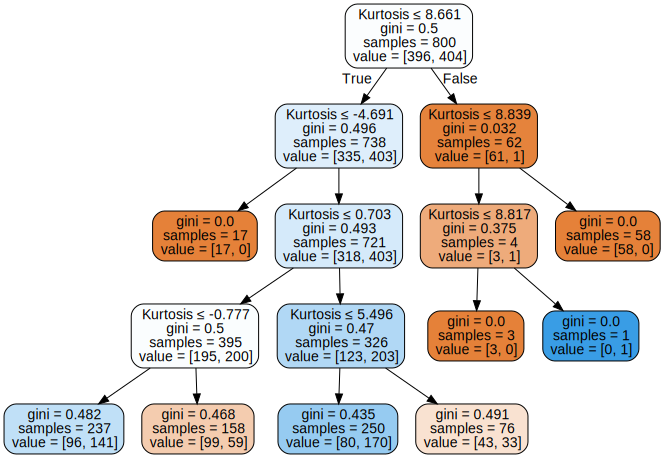

In [23]:
kurtosisTree = DecisionTreeClassifier(max_depth = 4)

yTrain = pd.DataFrame(noteTrain['Banknote'])
kurtosisTrain = pd.DataFrame(noteTrain['Kurtosis'])

yTest = pd.DataFrame(noteTest['Banknote'])
kurtosisTest = pd.DataFrame(noteTest['Kurtosis'])

kurtosisTree.fit(kurtosisTrain, yTrain)
kurtosisDot = export_graphviz(kurtosisTree, feature_names = kurtosisTrain.columns, out_file = None, filled = True,rounded = True, special_characters = True)
graphviz.Source(kurtosisDot)

Classification Accuracy 	: 0.665


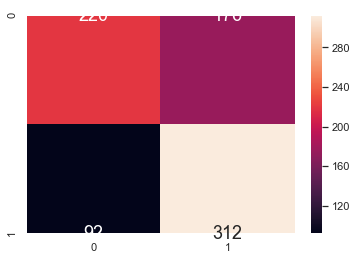

In [24]:
yTrainPred = kurtosisTree.predict(kurtosisTrain)
print("Classification Accuracy \t:", kurtosisTree.score(kurtosisTrain, yTrain))
sb.heatmap(confusion_matrix(yTrain, yTrainPred),annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.605


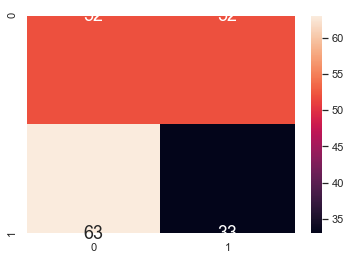

In [25]:
yTestPred = kurtosisTree.predict(skewnessTest)
print("Classification Accuracy \t:", kurtosisTree.score(kurtosisTest, yTest))
sb.heatmap(confusion_matrix(yTest, yTestPred), annot = True, fmt=".0f", annot_kws={"size": 18})

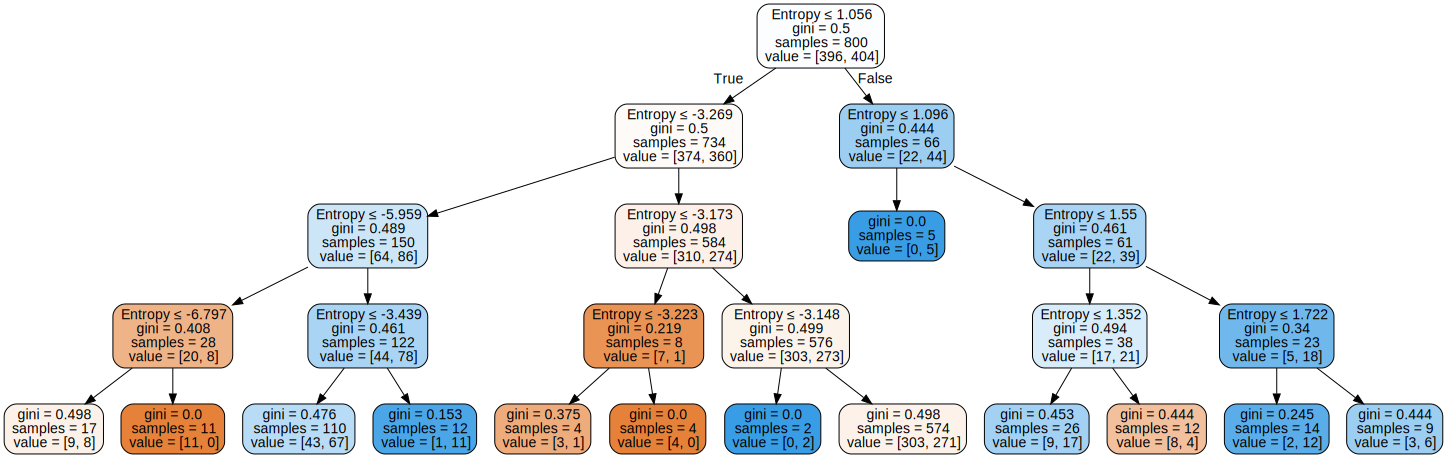

In [26]:
entropyTree = DecisionTreeClassifier(max_depth = 4)

yTrain = pd.DataFrame(noteTrain['Banknote'])
entropyTrain = pd.DataFrame(noteTrain['Entropy'])

yTest = pd.DataFrame(noteTest['Banknote'])
entropyTest = pd.DataFrame(noteTest['Entropy'])

entropyTree.fit(entropyTrain, yTrain)
entropyDot = export_graphviz(entropyTree, feature_names = entropyTrain.columns, out_file = None, filled = True,rounded = True, special_characters = True)
graphviz.Source(entropyDot)

Classification Accuracy 	: 0.5725


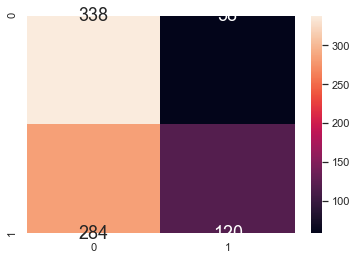

In [27]:
yTrainPred = entropyTree.predict(entropyTrain)
print("Classification Accuracy \t:", entropyTree.score(entropyTrain, yTrain))
sb.heatmap(confusion_matrix(yTrain, yTrainPred), annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.44


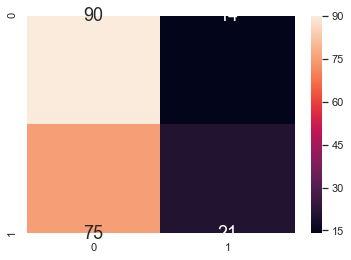

In [28]:
yTestPred = entropyTree.predict(entropyTest)
print("Classification Accuracy \t:", kurtosisTree.score(entropyTest, yTest))
sb.heatmap(confusion_matrix(yTest, yTestPred), annot = True, fmt=".0f", annot_kws={"size": 18})

### c) 

### Variance seems to be the best predictor for predicting Banknotes because it has a higher classification accuracy than the other models. The decision tree using "Variance" also has lower gini index in the first level of the decision tree when compared to the trees of the other predictors used.

# 3)
## a) and b)
### Multi variate decision tree model and confusion matrices for train and test data

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9675

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95



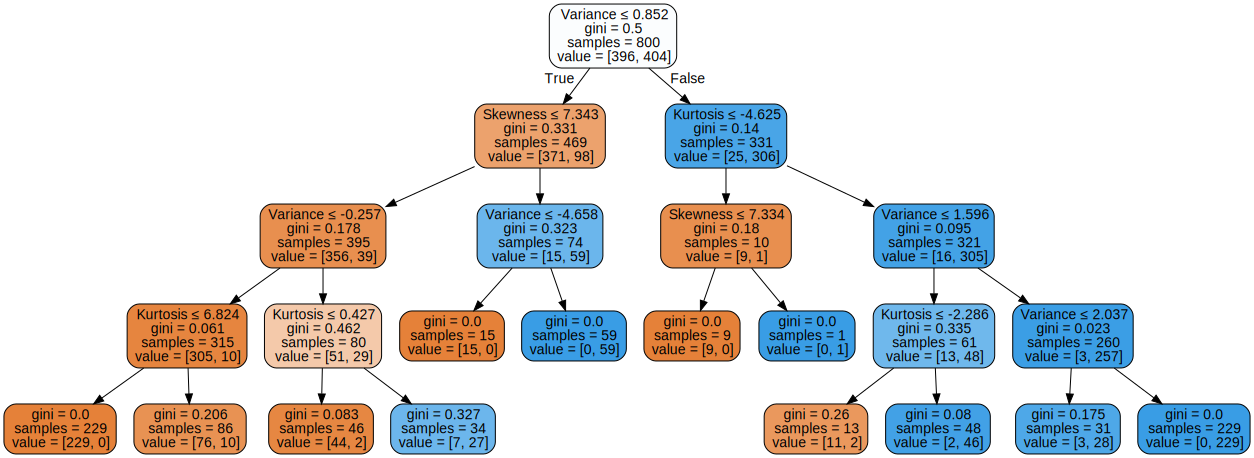

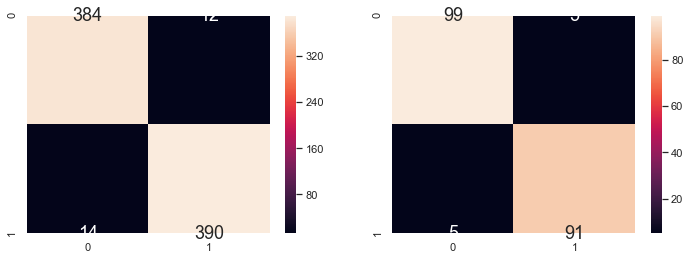

In [29]:
#using the same data shuffling and splits defined in the last question

yTrain = pd.DataFrame(noteTrain['Banknote'])
xTrain = pd.DataFrame(noteTrain[['Variance', 'Skewness', 'Kurtosis', 'Entropy']])

yTest = pd.DataFrame(noteTest['Banknote'])
xTest = pd.DataFrame(noteTest[['Variance', 'Skewness', 'Kurtosis', 'Entropy']])\

dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(xTrain, yTrain) 

y_train_pred = dectree.predict(xTrain)
y_test_pred = dectree.predict(xTest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(xTrain, yTrain))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(xTest, yTest))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(yTrain, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yTest, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree, feature_names = xTrain.columns, out_file = None, filled = True, rounded = True, special_characters = True)
graphviz.Source(treedot)

## c) False Negative Rate and False Positive Rate

In [30]:
tn_fp,fn_tp = confusion_matrix(yTrain, y_train_pred)
tn=tn_fp[0]
fp=tn_fp[1]
fn=fn_tp[0]
tp=fn_tp[1]

print("For the Train Dataset\n")

print("True-Negatives: ", tn, "\nFalse-Positives: ", fp, "\nFalse-Negatives: ", fn, "\nTrue-Positves: ",tp)
print()


#finding tpr,fpr,tnr,fnr
print("True-Positve rate:" ,tp/(tp+fn))
print("True-Negative rate:" ,tn/(fp+tn))
print("False-Positive rate:",fp/(fp+tn))
print("False-Negative rate :",fn/(tp+fn))

For the Train Dataset

True-Negatives:  384 
False-Positives:  12 
False-Negatives:  14 
True-Positves:  390

True-Positve rate: 0.9653465346534653
True-Negative rate: 0.9696969696969697
False-Positive rate: 0.030303030303030304
False-Negative rate : 0.034653465346534656


In [31]:
tn_fp,fn_tp = confusion_matrix(yTest, y_test_pred)
tn=tn_fp[0]
fp=tn_fp[1]
fn=fn_tp[0]
tp=fn_tp[1]

print("For the Test Dataset\n")

print("True-Negatives: ", tn, "\nFalse-Positives: ", fp, "\nFalse-Negatives: ", fn, "\nTrue-Positves: ",tp)
print()


#finding tpr,fpr,tnr,fnr
print("True-Positve rate:" ,tp/(tp+fn))
print("True-Negative rate:" ,tn/(fp+tn))
print("False-Positive rate:",fp/(fp+tn))
print("False-Negative rate :",fn/(tp+fn))

For the Test Dataset

True-Negatives:  99 
False-Positives:  5 
False-Negatives:  5 
True-Positves:  91

True-Positve rate: 0.9479166666666666
True-Negative rate: 0.9519230769230769
False-Positive rate: 0.04807692307692308
False-Negative rate : 0.052083333333333336


### d) Printing the False-Positive and False-Negative data

In [32]:
#Converting predicted values into a dataframe 
y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred.head() #dataframe containing predicted results for Banknote

,0
0,Forged
1,Forged
2,Forged
3,Genuine
4,Forged


In [33]:
yTrain.head()

,Banknote
611,Forged
839,Forged
891,Forged
474,Genuine
654,Forged


In [34]:
noteTrain['Predicted'] = "" #Creating a new column in the initial train dataset to compare resulting values 
noteTrain.index = range(len(noteTrain))#reindexing indices of initial Train set to start from 0 sequentially

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
for index, row in noteTrain.iterrows():
    noteTrain.at[index, 'Predicted'] = y_train_pred.at[index, 0] #copying the predicted values into the new column created in the drain dataset

In [36]:
fpCount = 0
fnCount = 0

#creating new dataframes for the false positive and false negatives from the train dataset
falsePositivesTrain = pd.DataFrame(columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Banknote']) 
falseNegativesTrain = pd.DataFrame(columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Banknote'])

#compares the banknotes and predicted column content to extract FP and FN
for index, row in noteTrain.iterrows():
    if(noteTrain.at[index, 'Banknote'] == 'Genuine' and noteTrain.at[index, 'Predicted'] == 'Forged'):
        falseNegativesTrain = falseNegativesTrain.append(row, ignore_index=False, verify_integrity=False, sort=None)
        fnCount += 1
    elif(noteTrain.at[index, 'Banknote'] == 'Forged' and noteTrain.at[index, 'Predicted'] == 'Genuine'):
        falsePositivesTrain = falsePositivesTrain.append(row, ignore_index=False, verify_integrity=False, sort=None)
        fpCount += 1

In [37]:
if (fpCount != 0):
    falsePositivesTrain = falsePositivesTrain.drop(['Predicted'], axis=1)
    
if (fnCount != 0):
    falseNegativesTrain = falseNegativesTrain.drop(['Predicted'], axis=1)

In [38]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
0,Genuine
1,Forged
2,Genuine
3,Genuine
4,Forged


In [39]:
yTest.describe()

,Banknote
count,200
unique,2
top,Forged
freq,104


In [40]:
noteTest['Predicted'] = ""
noteTest.index = range(len(noteTest))#reindexing indices of initial Train set to start from 0 sequentially

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe - Reindexing a dataframe sequentially

In [41]:
for index, row in noteTest.iterrows():
    noteTest.at[index, 'Predicted'] = y_test_pred.at[index, 0]

In [42]:
falsePositivesTest = pd.DataFrame(columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Banknote'])
falseNegativesTest = pd.DataFrame(columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Banknote'])

In [43]:
fpCount = 0
fnCount = 0

#follows the same process used for the train dataset
for index, row in noteTest.iterrows():
    if(noteTest.at[index, 'Banknote'] == 'Genuine' and noteTest.at[index, 'Predicted'] == 'Forged'):
        falseNegativesTest = falseNegativesTest.append(row, ignore_index=False, verify_integrity=False, sort=None)
        fnCount += 1
    elif(noteTest.at[index, 'Banknote'] == 'Forged' and noteTest.at[index, 'Predicted'] == 'Genuine'):
        falsePositivesTest = falsePositivesTest.append(row, ignore_index=False, verify_integrity=False, sort=None)
        fpCount += 1

if (fpCount != 0):
    falsePositivesTest = falsePositivesTest.drop(['Predicted'], axis=1)

if (fnCount != 0):
    falseNegativesTest = falseNegativesTest.drop(['Predicted'], axis=1)

Printing False Positive and False Negative rows from the train and test dataset

In [44]:
falsePositivesTrain

,Variance,Skewness,Kurtosis,Entropy,Banknote
227,0.214310,-0.69529,0.87711,0.296530,Forged
236,0.552980,-3.46190,1.70480,1.100800,Forged
266,1.742500,3.68330,-4.01290,-1.720700,Forged
428,0.143290,-1.08850,1.00390,0.487910,Forged
454,-0.172960,-1.18160,1.38180,0.733600,Forged
533,0.030219,-1.05120,1.40240,0.773690,Forged
540,1.563100,0.89599,-1.97020,0.654720,Forged
554,2.031000,1.85200,-3.01210,0.003003,Forged
615,2.017700,1.79820,-2.95810,0.209900,Forged
617,1.437800,0.66837,-2.02670,1.027100,Forged


In [45]:
falseNegativesTrain

,Variance,Skewness,Kurtosis,Entropy,Banknote
11,-1.778100,0.854600,7.1303,0.027572,Genuine
126,-1.393100,1.566400,7.5382,0.784030,Genuine
189,-0.644720,-4.606200,8.3470,-2.709900,Genuine
198,1.480600,7.637700,-2.7876,-1.034100,Genuine
200,-1.734400,2.017500,7.7618,0.935320,Genuine
239,0.117390,6.276100,-1.5495,-2.474600,Genuine
306,-1.131300,1.903700,7.5339,1.022000,Genuine
388,-1.257600,1.589200,7.0078,0.424550,Genuine
425,-1.338900,1.552000,7.0806,1.031000,Genuine
458,-1.505500,0.070346,6.8681,-0.506480,Genuine


In [46]:
falsePositivesTest

,Variance,Skewness,Kurtosis,Entropy,Banknote
3,-4.47790,7.3708,-0.31218,-6.77540,Forged
7,1.67990,4.2068,-4.53980,-2.39310,Forged
12,0.74428,-3.7723,1.61310,1.57540,Forged
110,0.16358,-3.3584,1.37490,1.35690,Forged
190,0.00312,-4.0061,1.79560,0.91722,Forged


In [47]:
falseNegativesTest

,Variance,Skewness,Kurtosis,Entropy,Banknote
39,-0.36038,4.11580,3.1143,-0.37199,Genuine
40,0.64295,7.10180,0.3493,-0.41337,Genuine
46,-1.61620,0.80908,8.1628,0.60817,Genuine
117,-0.39816,5.97810,1.3912,-1.16210,Genuine
184,-1.50750,1.92240,7.1466,0.89136,Genuine


### e) Predictions based on custom input

In [48]:
inputValues = pd.DataFrame([[-4.9447,3.3005,1.063,-1.444],[0.94225,5.8561,1.8762,-0.32544],[2.2429,-4.1427,5.2333,-0.40173],[0.53936,3.8944,-4.8166,-4.3418],[-2.5724,-0.95602,2.7073,-0.16639]],columns=['Variance','Skewness','Kurtosis','Entropy'])

In [49]:
inputValues

,Variance,Skewness,Kurtosis,Entropy
0,-4.94470,3.30050,1.0630,-1.44400
1,0.94225,5.85610,1.8762,-0.32544
2,2.24290,-4.14270,5.2333,-0.40173
3,0.53936,3.89440,-4.8166,-4.34180
4,-2.57240,-0.95602,2.7073,-0.16639


In [50]:
inputValues['Banknote'] = dectree.predict(pd.DataFrame(inputValues[['Variance','Skewness','Kurtosis','Entropy']]))

https://www.datacamp.com/community/tutorials/decision-tree-classification-python - Using the classification model created to test custom user data

In [51]:
inputValues

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,-4.94470,3.30050,1.0630,-1.44400,Forged
1,0.94225,5.85610,1.8762,-0.32544,Genuine
2,2.24290,-4.14270,5.2333,-0.40173,Genuine
3,0.53936,3.89440,-4.8166,-4.34180,Forged
4,-2.57240,-0.95602,2.7073,-0.16639,Forged
